Методом наименьших квадратов найти зависимость вида `s(x) = ax2 + bx + c` между табличными данными `x` и `y`:
| xi | -2 | -1 | 2  | 3 | 4 |
|----|----|----|----|---|---|
| yi | -5 | -4 | -1 | 0 | 1 |

Написать программу на Python составления и решения системы линейных уравнений относительно значений a, b, c.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Сумма элементов массива
def summa(x, p):
    x = np.power(x, p)
    return x.sum()

In [8]:
def least_square(x, y):
    A = np.array([
        [summa(x, 4), summa(x, 3), summa(x, 2)],
        [summa(x, 3), summa(x, 2), summa(x, 1)],
        [summa(x, 2), summa(x, 1), len(x)]
    ])
    B = np.array([summa(np.matmul(np.power(x, 2), y), 1), summa(np.matmul(x, y), 1), summa(y, 1)])
    det = np.linalg.det(A)
    a_A = np.array([
            [B[0], A[0][1], A[0][2]],
            [B[1], A[1][1], A[1][2]],
            [B[2], A[2][1], A[2][2]],
        ])
    b_A = np.array([
            [A[0][0], B[0], A[0][2]],
            [A[1][0], B[1], A[1][2]],
            [A[2][0], B[2], A[2][2]],
        ])
    c_A = np.array([
            [A[0][0], A[0][1], B[0]],
            [A[1][0], A[1][1], B[1]],
            [A[2][0], A[2][1], B[2]],
        ])
    a = round(np.linalg.det(a_A)/det, 2)
    b = round(np.linalg.det(b_A)/det, 2)
    c = round(np.linalg.det(c_A)/det, 2)
    return a, b, c

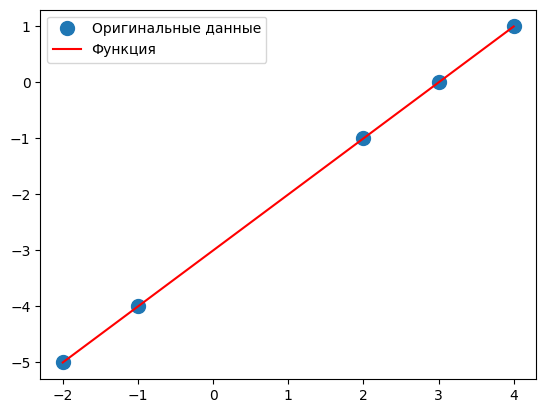

In [9]:
x = np.array([-2, -1, 2, 3, 4])
y = np.array([-5, -4, -1, 0, 1])
a, b, c = least_square(x, y) 
_ = plt.plot(x, y, 'o', label='Оригинальные данные', markersize=10)
_ = plt.plot(x, a*x**2 + b*x + c, 'r', label='Функция')
_ = plt.legend()
plt.show()

## 2 Задача


In [10]:
from scipy import linalg
import matplotlib.pyplot as plt
def ppp(a0, b0, n, m):
    h = (b0 - a0)/n
    A = np.mat(np.zeros((n+1, m+1), dtype=float))
    x = np.zeros((n+1), dtype=float)
    y = np.zeros((n+1), dtype=float)
    y1 = np.zeros((n+1), dtype=float)
    y2 = np.zeros((n+1), dtype=float)
    y3 = np.zeros((n+1), dtype=float)

    x = np.arange(0, n, 1)
    y = np.zeros((n+1), dtype=float)

    for i in range(0, n):
        xx = x[i]
        y[i] = xx - np.sin(xx) - 0.25

    plt.plot(x, y, ".-", label="exact")

    # x = np.zeros((n+1), dtype=float)
    # y = np.zeros((n+1), dtype=float)

    # for i in range(0, n+1):
    #     xx = a0 + (i*h)
    #     x[i] = xx
    #     y[i] = xx - np.sin(xx) - 0.25
    #     for k in range(0, m):
    #         A[i,k] = xx**k
    # a, resid, rank, sigma = linalg.lstsq(A, y)
    # for i in range(0, n+1):
    #     xx = a0 + (i*h)
    #     sum = 0.
    #     for k in range(0, m):
    #         sum += a[k]*xx**k
    #     y1[i] = sum

    # plt.plot(x, y, ".-", label="exact")
    # plt.plot(x, y1, "+:", label="polinom")
    # plt.plot(x, y2, "+:", label="polinom")
    # plt.plot(x, y3, "+:", label="polinom")
    plt.xlabel("$x$")
    plt.legend()
    plt.show()
# ppp(0, 1, 10, 3)

## 3 задача
Прибыль фирмы за некоторый период деятельности по годам приве-
дена ниже:
| Год | 1 | 2 | 3  | 4 | 5 |
|----|----|----|----|---|---|
| Прибыль | 2,9 | 3,3 | 3,1 | 3,5 | 3,9 |

- Составьте зависимость прибыли по годам деятельности фирмы
методом наименьших квадратов.
- Определите ожидаемую прибыль для шестого и седьмого года
деятельности.
- Покажите график.


6 Год:  4.18
7 Год:  4.66


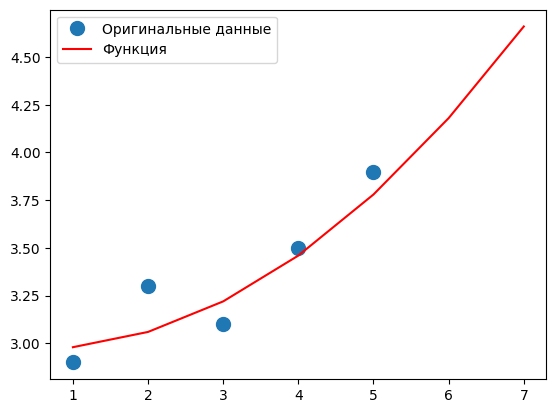

In [11]:
x = np.arange(1, 6, 1)
y = np.array([2.9, 3.3, 3.1, 3.5, 3.9])
a, b, c = least_square(x, y) 
_ = plt.plot(x, y, 'o', label='Оригинальные данные', markersize=10)
future_x = np.arange(1, 8, 1)
_ = plt.plot(future_x, a*future_x**2 + b*future_x + c, 'r', label='Функция')
_ = plt.legend()
print("6 Год: ", a*6**2 + b * 6 + c)
print("7 Год: ", a*7**2 + b * 7 + c)
plt.show()